In [1]:
import pyspedas
from pyspedas import time_string
from pytplot import tplot, get_data

import sunpy 
import sunpy.coordinates as scoordss
import sys, os
import datetime
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [2]:
#beautify plots

import matplotlib as mpl

mpl.rcParams['font.family'      ]='Arial'#'Gill Sans'
mpl.rcParams['mathtext.default' ]='regular'
mpl.rcParams['font.size'        ]=12
mpl.rcParams['figure.figsize'   ]=(6,4)
mpl.rcParams['figure.dpi'       ]=180
mpl.rcParams['axes.linewidth'   ]=1.2
mpl.rcParams['xtick.major.size' ]=5
mpl.rcParams['xtick.minor.size' ]=4
mpl.rcParams['ytick.major.size' ]=5
mpl.rcParams['ytick.minor.size' ]=3
mpl.rcParams['xtick.major.width']=1
mpl.rcParams['ytick.major.width']=1
mpl.rcParams['xtick.direction'  ]='out'
mpl.rcParams['ytick.direction'  ]='out'

mpl.rcParams['savefig.bbox'     ]='tight'

mpl.rcParams['animation.html'   ]='jshtml'

In [3]:
### Set range of timestamps
dt_start = "2015-07-07 11:44:55" 
dt_end = "2015-07-15 11:44:55"

mfi = pyspedas.projects.omni.data(trange=[dt_start,dt_end],datatype='1min',time_clip=True);
B_GSE = get_data('BX_GSE')

date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in B_GSE.times]

rd = {'Time': date_obj, 'Bx': get_data('BX_GSE').y, 'By': get_data('BY_GSE').y, 'Bz':get_data('BZ_GSE').y,
     'Vx':  get_data('Vx').y,
      'Vy':   get_data('Vy').y, 
      'Vz':   get_data('Vz').y,  
      'np':   get_data('proton_density').y, 
      'Tp':  get_data('T').y,
    'P' : get_data('Pressure').y,
     'sym-h': get_data('SYM_H').y}
sw = pd.DataFrame(data=rd)

sw.head()

06-Oct-25 16:33:48: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_1min/2015/
06-Oct-25 16:33:48: File is current: omni_data/hro_1min/2015/omni_hro_1min_20150701_v01.cdf


,Time,Bx,By,Bz,Vx,Vy,Vz,np,Tp,P,sym-h
0,2015-07-07 11:45:00,1.57,-3.03,-0.50,-459.600006,2.1,6.7,2.16,80886.0,0.91,-24
1,2015-07-07 11:46:00,1.57,-3.10,-0.38,-459.600006,2.1,6.7,2.16,80886.0,0.91,-24
2,2015-07-07 11:47:00,1.59,-3.12,-0.22,-454.799988,5.2,8.3,2.11,80257.0,0.87,-24
3,2015-07-07 11:48:00,1.42,-3.13,-0.27,-454.799988,5.2,8.3,2.11,80257.0,0.87,-24
4,2015-07-07 11:49:00,0.82,-3.55,-0.02,-457.399994,3.5,9.2,2.25,80208.0,0.94,-24


The mean V of the high-speed stream is: 585.9 km/s


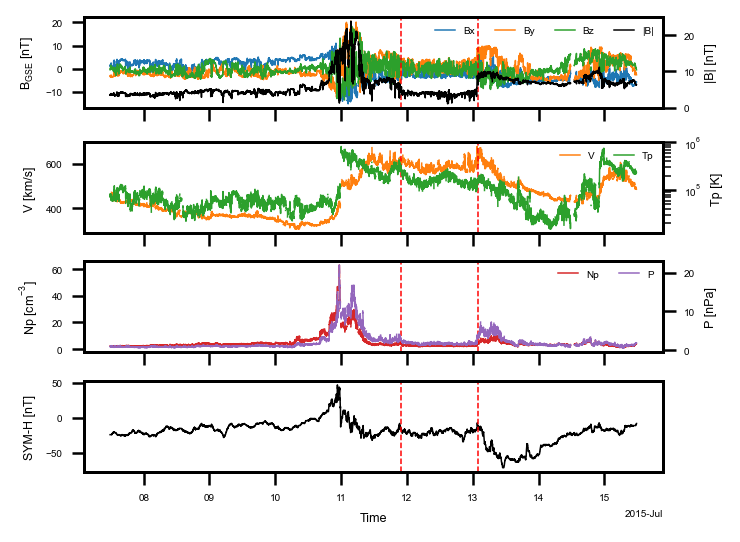

In [21]:
# Prepare data
df = sw.copy()
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

df['B'] = np.sqrt(df['Bx']**2 + df['By']**2 + df['Bz']**2)
df['V'] = np.sqrt(df['Vx']**2 + df['Vy']**2 + df['Vz']**2)

# Set smaller fonts and thinner lines for compact figure
mpl.rcParams.update({
    "font.size": 5,
    "axes.titlesize": 5,
    "axes.labelsize": 5,
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "legend.fontsize": 4,
    "lines.linewidth": 0.6,
})

# Create a compact figure with 4 subplots
fig, axs = plt.subplots(4, 1, figsize=(4, 2.9), sharex=True, constrained_layout=True)

# 1. Magnetic field components + total B
ax0a = axs[0]
ax0b = ax0a.twinx()
ax0a.plot(df.index, df['Bx'], label='Bx')
ax0a.plot(df.index, df['By'], label='By')
ax0a.plot(df.index, df['Bz'], label='Bz')
ax0a.set_ylabel(r'B$_{GSE}$ [nT]')
ax0b.plot(df.index, df['B'], color='black', label='|B|')
ax0b.set_ylabel('|B| [nT]')
lines_a, labels_a = ax0a.get_legend_handles_labels()
lines_b, labels_b = ax0b.get_legend_handles_labels()
axs[0].legend(lines_a + lines_b, labels_a + labels_b, loc='upper right', frameon=False, ncol=4)

# 2. Velocity + Temperature
ax1a = axs[1]
ax1b = ax1a.twinx()
ax1a.plot(df.index, df['V'], color='tab:orange', label='V')
ax1a.set_ylabel('V [km/s]')
ax1b.plot(df.index, df['Tp'], color='tab:green', label='Tp')
ax1b.set_ylabel('Tp [K]')
ax1b.set_yscale('log')
lines_a, labels_a = ax1a.get_legend_handles_labels()
lines_b, labels_b = ax1b.get_legend_handles_labels()
axs[1].legend(lines_a + lines_b, labels_a + labels_b, loc='upper right', frameon=False, ncol=2)

# 3. Density + Pressure
ax2a = axs[2]
ax2b = ax2a.twinx()
ax2a.plot(df.index, df['np'], color='tab:red', label='Np')
ax2a.set_ylabel(r'Np [cm$^{-3}$]')
ax2b.plot(df.index, df['P'], color='tab:purple', label='P')
ax2b.set_ylabel('P [nPa]')
lines_a, labels_a = ax2a.get_legend_handles_labels()
lines_b, labels_b = ax2b.get_legend_handles_labels()
axs[2].legend(lines_a + lines_b, labels_a + labels_b, loc='upper right', frameon=False, ncol=2)

# 4. SYM-H
axs[3].plot(df.index, df['sym-h'], color='black')
axs[3].set_ylabel('SYM-H [nT]')
axs[3].set_xlabel('Time')

# Add vertical lines for HSS interval
t0 = pd.Timestamp("2015-07-11 21:44:55")
t1 = pd.Timestamp("2015-07-13 01:44:55")
for ax in axs:
    ax.axvline(t0, color="red", linestyle="--", linewidth=0.6)
    ax.axvline(t1, color="red", linestyle="--", linewidth=0.6)

# Print average velocity
df_v = df[t0:t1]
print("The mean V of the high-speed stream is: {:.1f} km/s".format(df_v["V"].mean()))

# Save the reduced-size figure
plt.savefig('/Users/khagendrakatwal/Desktop/Insitu_Final_small.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Duration Between Coronal Hole Observation and Solar Wind Impact at 1 AU

In [15]:
dt_start = pd.Timestamp("2015-07-07 11:44:55")
t0 = pd.Timestamp("2015-07-15 23:44:55")

time_diff = t0 - dt_start
print(time_diff)

8 days 12:00:00


# ICME Catalog

In [16]:
import pandas as pd
url='https://helioforecast.space/static/sync/icmecat/HELIO4CAST_ICMECAT_v23.csv'
ic=pd.read_csv(url)

ic = ic[ic["sc_insitu"]=="Wind"]

ic["icme_start_time"] = pd.to_datetime(ic["icme_start_time"], utc=True).dt.tz_localize(None)

ic["mo_end_time"] = pd.to_datetime(ic["mo_end_time"], utc=True).dt.tz_localize(None)

#I am choosing 2018 as a reference

df_cme = ic[ic["icme_start_time"].dt.year==2015].iloc[:, [3,5]]

df_cme

,icme_start_time,mo_end_time
712,2015-12-31 00:19:00,2016-01-01 11:56:00
713,2015-12-19 15:35:00,2015-12-21 23:02:00
716,2015-11-06 17:46:00,2015-11-08 16:47:00
717,2015-10-24 17:59:00,2015-10-28 13:11:00
718,2015-10-06 21:35:00,2015-10-07 10:04:00
719,2015-09-07 13:05:00,2015-09-09 14:52:00
723,2015-06-22 18:07:00,2015-06-24 13:03:00
725,2015-05-10 08:23:00,2015-05-11 04:47:00
727,2015-05-08 02:52:00,2015-05-09 10:34:00
728,2015-05-06 00:56:00,2015-05-07 14:23:00
